# Projet 1 : Analyse Exploratoire des Données (EDA)

##  Contexte
 L'analyse exploratoire des données (EDA) est une étape clé dans tout
 projet de data science. Ce projet permet de montrer votre capacité à
 comprendre des données brutes, à les nettoyer, et à formuler des
 hypothèses avant d'appliquer des modèles plus complexes.
## Objectifs 
Comprendre la structure des données et leur distribution.
 Identifier les variables importantes et les relations entre elles.
 Produire des visualisations claires pour présenter les résultats.
## Problématiques 
Banque : Comment analyser les transactions bancaires pour identifier
 des schémas de fraude ?



## Dataset : https://www.kaggle.com/datasets/mlgulb/creditcardfraud

### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

##### 'Time' : Nombre de secondes écoulés entre chaque transaction et la première.
##### 'Amount' : Montant de la transaction
##### 'Class' : fraud = 1, sinon 0

## Chargement et exploration initiale des données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import streamlit as st

In [3]:
df = pd.read_csv('creditcard.csv')
df.dataframeName = 'creditcard.csv'
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.index

RangeIndex(start=0, stop=284807, step=1)

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Nettoyage des données

In [10]:
df.isnull().sum()
# il n'y a pas de valeurs nulles/manquantes

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(1081)

In [12]:
df = df.drop_duplicates()
df.duplicated().sum()
# On supprime les doublons

np.int64(0)

## Analyse univariée

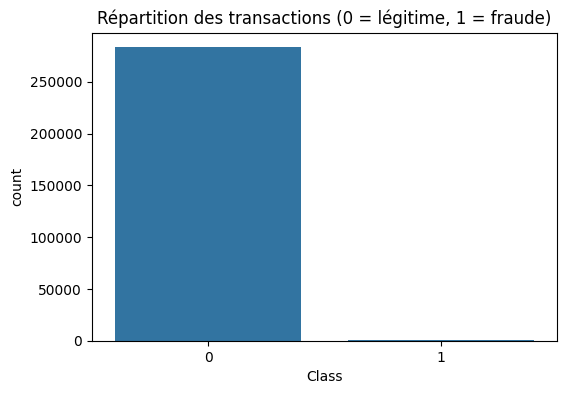

In [13]:
# 1. Distribution de la variable cible (fraude ou non)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Répartition des transactions (0 = légitime, 1 = fraude)')
plt.show()


On observe que la classe est déséquilibré avec très peu de fraudes.

In [14]:
df['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

Le coup moyen d'une transaction est de 88 euros, La moitié des transactions sont inférieures à 22 euros et la plus grande trasaction est de 25691 euros.

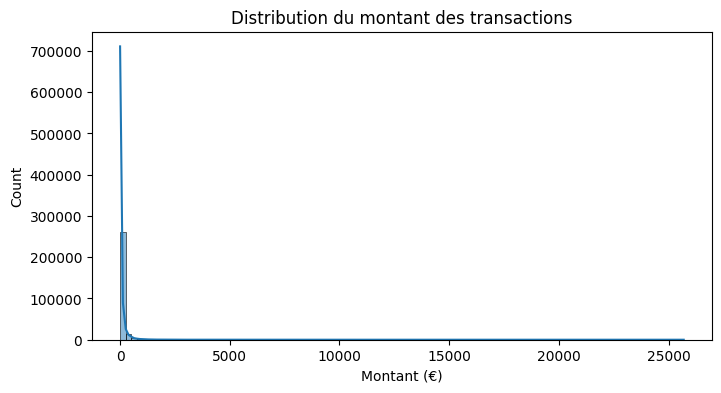

In [15]:
# 2. Distribution du montant des transactions
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Distribution du montant des transactions')
plt.xlabel('Montant (€)')
plt.show()

In [ ]:
# On affiche une valeur proche du 3eme quartile
plt.figure(figsize=(8,4))
sns.histplot(df[df['Amount']<50],kde=True)
plt.title('Distribution du montant des transactions')
plt.xlabel('Montant (€)')
plt.show()

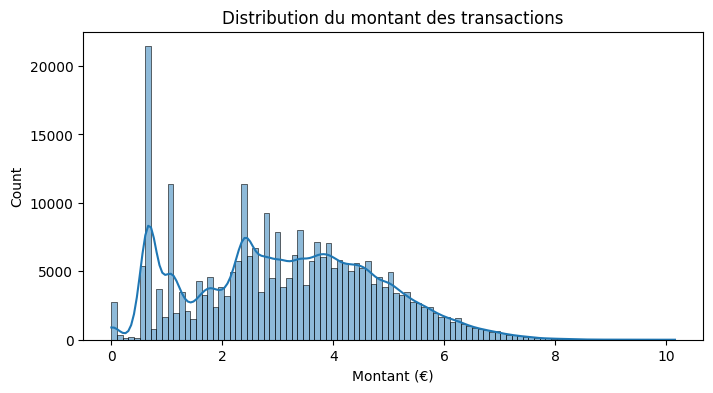

In [17]:
df['log_Amount'] = np.log1p(df['Amount'])  # log1p(x) = log(1 + x)
plt.figure(figsize=(8,4))
sns.histplot(df['log_Amount'], bins=100, kde=True)
plt.title('Distribution du montant des transactions')
plt.xlabel('Montant (€)')
plt.show()

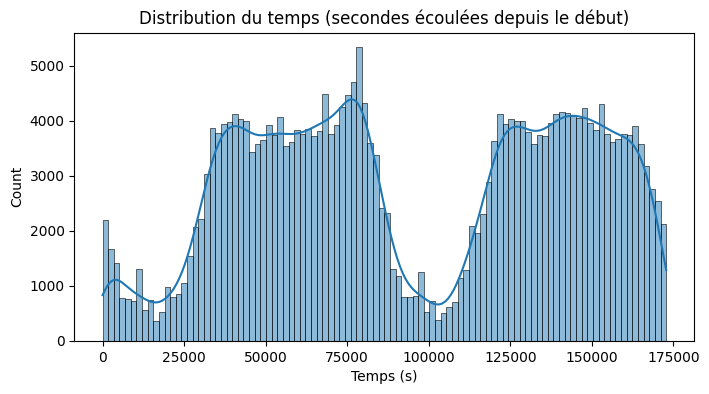

In [18]:
# 3. Distribution de la variable "Time"
plt.figure(figsize=(8,4))
sns.histplot(df['Time'],bins=100, kde=True)
plt.title('Distribution du temps (secondes écoulées depuis le début)')
plt.xlabel('Temps (s)')
plt.show()

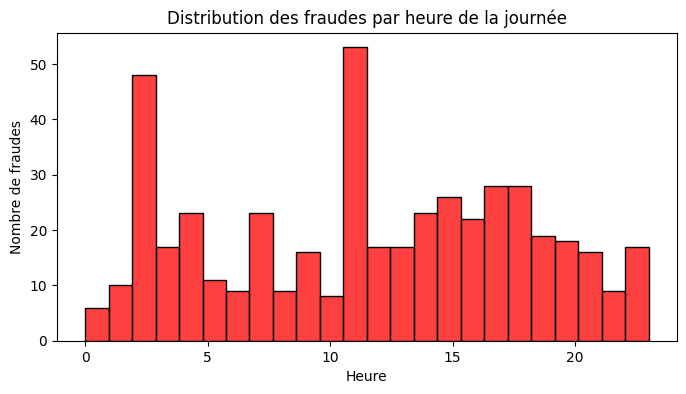

In [19]:
# Le temps est donné en secondes depuis le début de la collecte
# On transforme ça en "heure dans la journée" et "jour depuis le début"

df['hour'] = (df['Time'] // 3600) % 24  # heure entre 0 et 23
df['day'] = df['Time'] // (3600 * 24)   # jour depuis le début

# Visualisation : distribution des fraudes par heure
plt.figure(figsize=(8,4))
sns.histplot(data=df[df['Class'] == 1], x='hour', bins=24, kde=False, color='red')
plt.title("Distribution des fraudes par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Nombre de fraudes")
plt.show()

En supposant que l'heure 0 est minuit, on observe que les heure où se produisent le plus de fraudes est entre 11h et 12h et entre 2 et 3h.

## Analyse bivariée

In [20]:
corr_matrix = df.corr(numeric_only=True)

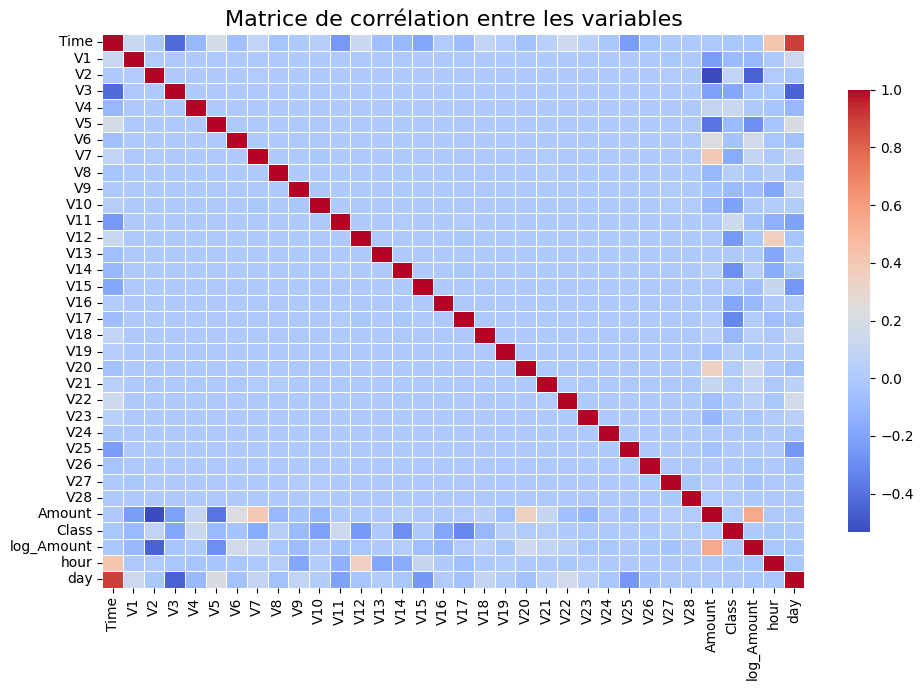

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matrice de corrélation entre les variables", fontsize=16)
plt.tight_layout()
plt.show()

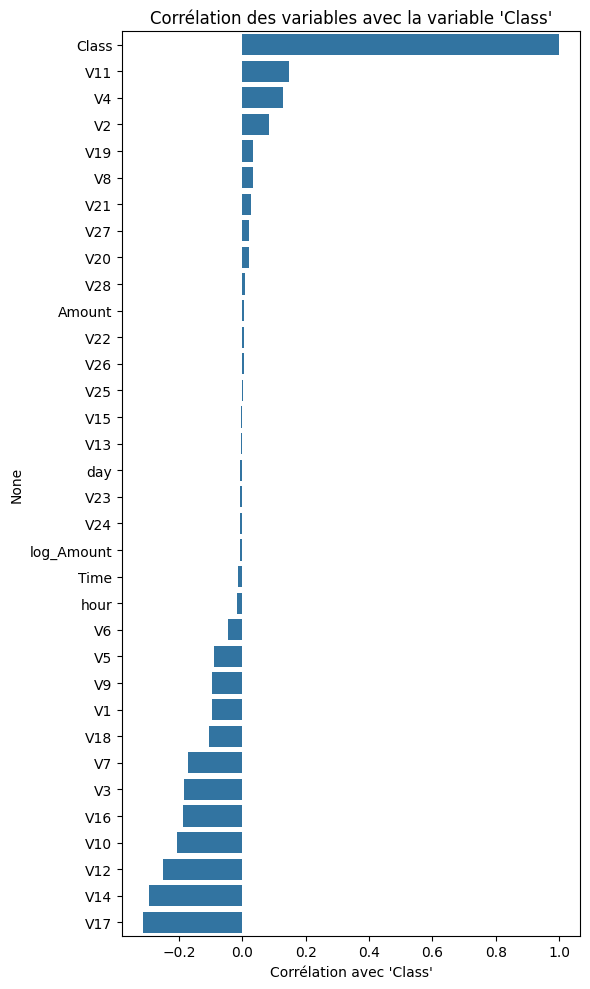

In [22]:
cor_Class = corr_matrix['Class'].sort_values(ascending=False)

# Affichage plus lisible
plt.figure(figsize=(6,10))
sns.barplot(x=cor_Class.values, y=cor_Class.index)
plt.title("Corrélation des variables avec la variable 'Class'")
plt.xlabel("Corrélation avec 'Class'")
plt.tight_layout()
plt.show()

Class est légèrement négativements corrélés à V17,V14 et V12. 

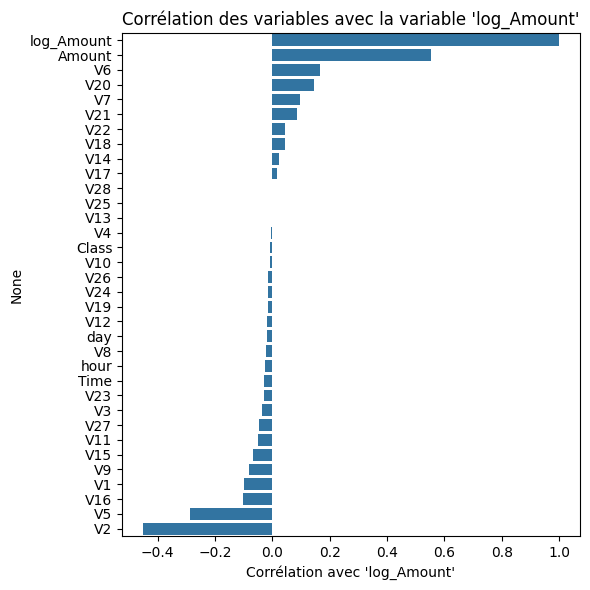

In [23]:
cor_target = corr_matrix['log_Amount'].sort_values(ascending=False)

# Affichage plus lisible
plt.figure(figsize=(6,6))
sns.barplot(x=cor_target.values, y=cor_target.index)
plt.title("Corrélation des variables avec la variable 'log_Amount'")
plt.xlabel("Corrélation avec 'log_Amount'")
plt.tight_layout()
plt.show()

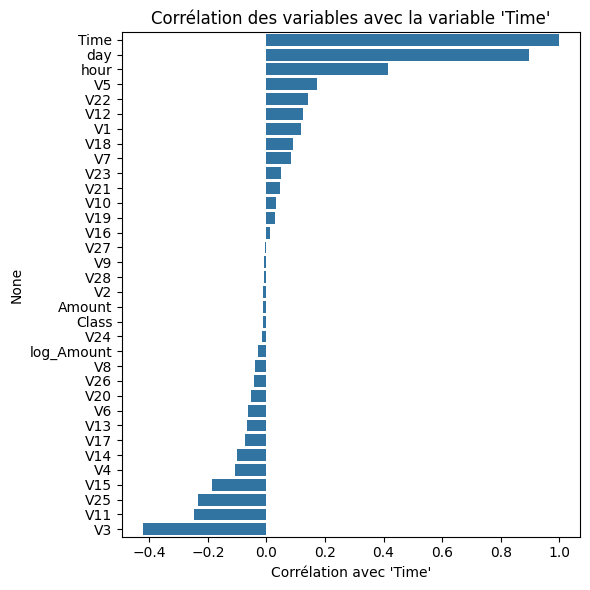

In [24]:
cor_target = corr_matrix['Time'].sort_values(ascending=False)

# Affichage plus lisible
plt.figure(figsize=(6,6))
sns.barplot(x=cor_target.values, y=cor_target.index)
plt.title("Corrélation des variables avec la variable 'Time'")
plt.xlabel("Corrélation avec 'Time'")
plt.tight_layout()
plt.show()

- Time est négativement corrélés à V3 de manière conséquente et légèrement V11,V15 et V25 mais légèrement positivement V5,V22,V12 et V1.
- Amount est fortement négativement corrélés à V2, négativement corrélés à V5 mais postivement corrélés à V6,V7 et V20.
- Class est légèrement négativements corrélés à V17,V14 et V12. 

In [25]:
# On s'intéresse à la corrélation entre les variables et la variable cible 'Class'
# On va chercher les variables qui ont une corrélation significative avec 'Class'
top_vars_positive = cor_Class[cor_Class > 0.1].index.tolist()
top_vars_positive.remove('Class')
top_vars_neg = cor_Class[cor_Class < -0.2].index.tolist()
top_vars = top_vars_positive + top_vars_neg
print(top_vars_positive)
print(top_vars_neg)
print(top_vars)

['V11', 'V4']
['V10', 'V12', 'V14', 'V17']
['V11', 'V4', 'V10', 'V12', 'V14', 'V17']


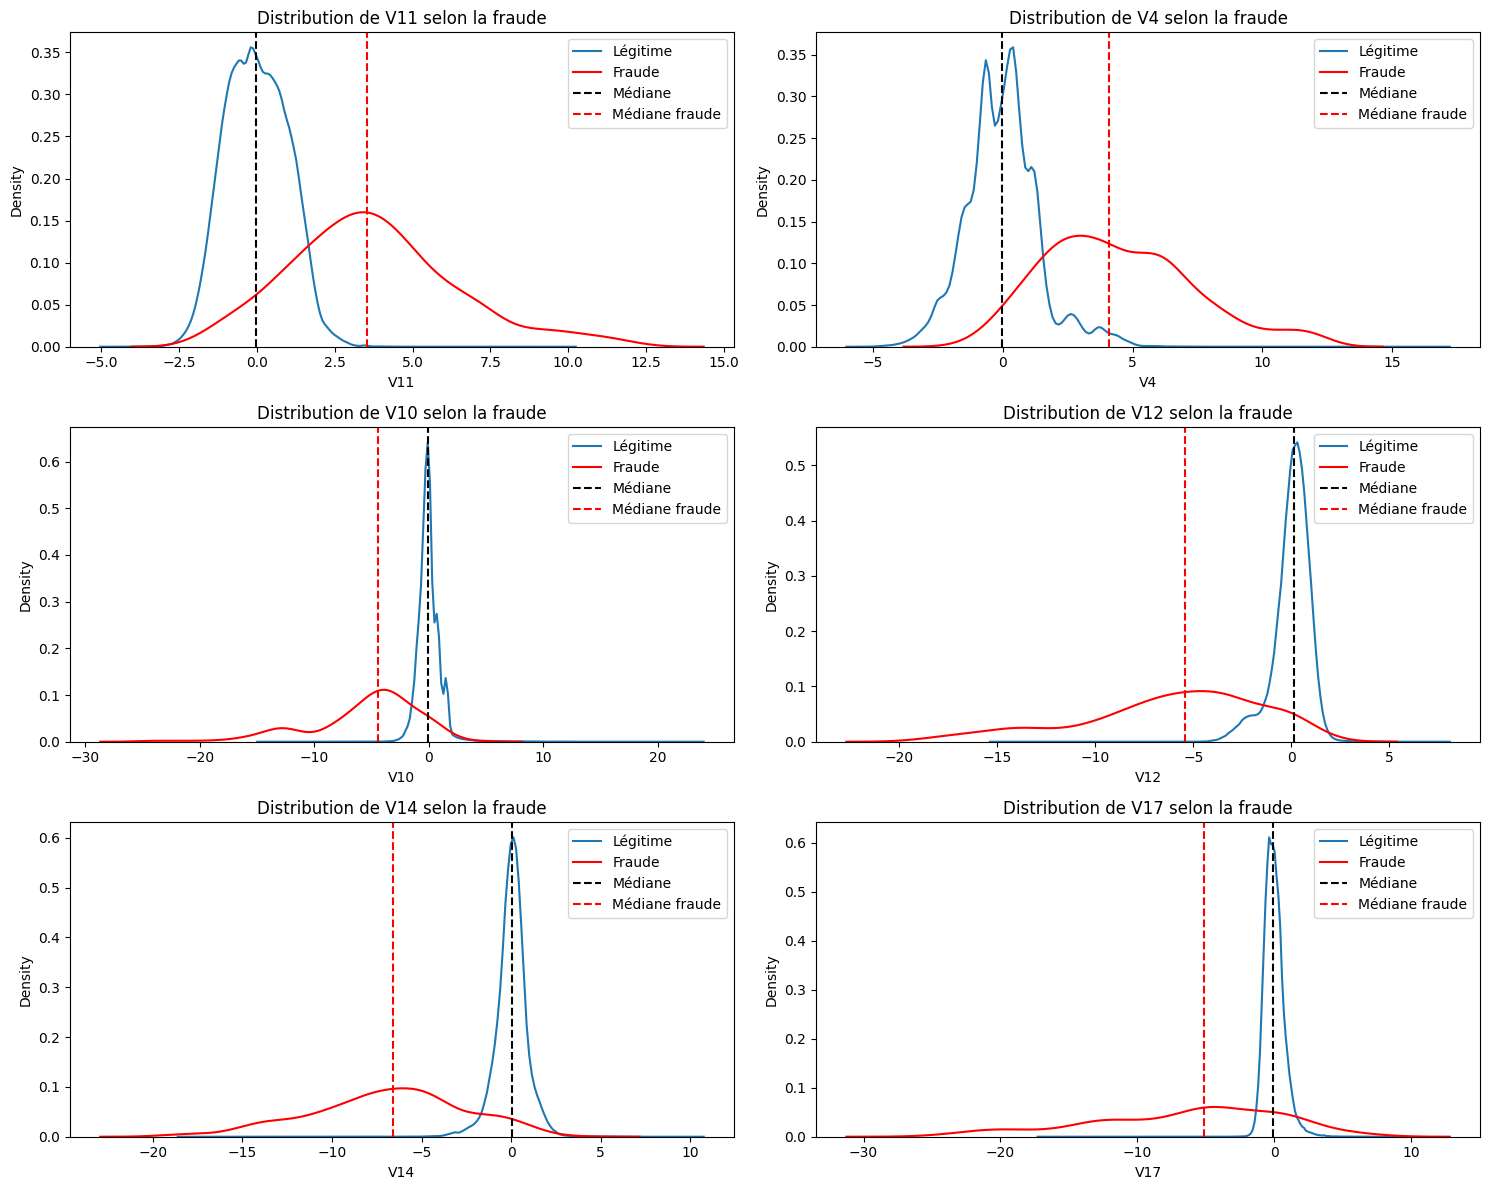

In [26]:
sample_df = df.sample(frac=1, random_state=42)
plt.figure(figsize=(15, 12))
for i, var in enumerate(top_vars, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=sample_df[sample_df['Class'] == 0], x=var, label='Légitime', fill=False)
    sns.kdeplot(data=sample_df[sample_df['Class'] == 1], x=var, label='Fraude', fill=False, color='red')
    #tracer une droite verticale pour la médiane
    plt.axvline(sample_df[var].median(), color='black', linestyle='--', label='Médiane')
    plt.axvline(sample_df[sample_df['Class'] == 1][var].median(), color='red', linestyle='--', label='Médiane fraude')
    plt.title(f'Distribution de {var} selon la fraude')
    plt.legend()

plt.tight_layout()
plt.show()

## Conclusion
Cette analyse exploratoire a permis de mieux comprendre la structure des transactions bancaires, de visualiser la distribution des montants et des horaires, et d’identifier certains patterns liés à la fraude.  
Grâce à l’utilisation de Streamlit, les visualisations sont désormais accessibles de façon interactive, facilitant la détection d’anomalies et la prise de décision.  
Cette étape constitue une base solide avant d'appliquer des modèles de machine learning pour la détection automatique de fraudes.

Pour aller plus loin, on peut pousser plus loin l'analyse multivariée, faire un clustering, une réduction de dimensions à l'aide d'une PCA, ou encore un début de modélisation.